# Réaliser une étude de santé publique

# Importation des librairies

In [1]:
# coding: utf8

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
UNITE_VALEUR_POP = 1000

In [4]:
POP_MONDIALE_FAO = 6997326000

In [5]:
NB_JOURS_ANNEE = 365

In [6]:
APPORT_JOUR_KCAL = 2400

In [7]:
APPORT_JOUR_KGPROTEINE = 0.056

In [8]:
# Colonnes retenues pour Bilans Alimentaires
colonneBilAlim = ['Code zone', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Année', 'Unité',
       'Valeur']

In [9]:
# Colonnes retenues pour Sécurité Alimentaire (dataframe SousAlimentation)
colonneSecAlim = ['Code zone', 'Zone','Code Produit', 'Produit', 'Année', 'Unité',
       'Valeur']

In [10]:
POP_MONDIALE_ACTUELLE = 7794799000

#  Importation des bases de données

In [11]:
df_population = pd.read_csv("fr_population.csv")
df_animaux = pd.read_csv("fr_animaux.csv")
df_vegetaux = pd.read_csv("fr_vegetaux.csv")
df_cereales = pd.read_csv("fr_cereales.csv")
df_sousAlimentation = pd.read_csv("fr_sousalimentation.csv")


## 1. Création des dataframes 
### 1.1 Sélection des colonnes pertinentes

In [12]:
df_population.columns

Index(['Code Domaine', 'Domaine', 'Code zone', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')

In [13]:
df_animaux.shape
df_cereales.shape
df_population.shape
df_sousAlimentation.shape
df_vegetaux.shape

(104871, 14)

In [14]:
# Seules les colonnes 'Code zone','Zone' et Valeur' sont retenues
df_population = df_population.loc[:,['Code zone','Zone','Valeur']]

In [15]:
# Les colonnes des dataframes "Animaux, "vegetaux", "cereales" sont identiques
df_animaux.columns

Index(['Code Domaine', 'Domaine', 'Code zone', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')

In [16]:
# On ne garde que les colonnes qui nous intéressent
df_animaux = df_animaux.loc[:,colonneBilAlim]
df_vegetaux = df_vegetaux.loc[:,colonneBilAlim]
df_cereales = df_cereales.loc[:,colonneBilAlim]
df_sousAlimentation = df_sousAlimentation.loc[:,colonneSecAlim]

In [17]:
# On rajoute une colonne 'Origne' qui contient la valeur 'Végétal' pour df_vegetaux
df_vegetaux['Origine']='Végétal'

In [18]:
# On rajoute une colonne 'Origne' qui contient la valeur 'Animal' pour df_animaux
df_animaux['Origine']='Animal'

In [19]:
# On rajoute une colonne'Origne' qui contient la valeur 'Céréale' pour df_cereales
df_cereales['Origine']='Céréale'

In [20]:
df_sousAlimentation['Année'].value_counts()

2013-2015    204
2014-2016    204
2015-2017    204
2012-2014    204
2016-2018    204
Name: Année, dtype: int64

#### Changement de format de la date dans le dataframe df_sousAlimentation :  

In [21]:
# Les données de la colonne "Année" sont harmonisées pour être au même format que celles des autres dataframes
df_sousAlimentation['Année'] = df_sousAlimentation['Année'].map({'2012-2014' : 2013,'2013-2015' : 2014, '2014-2016' : 2015, '2015-2017' : 2016, '2016-2018' : 2017}) 

In [22]:
# Changement du type de données de 'Valeur'/ Objet => float
df_sousAlimentation.Valeur = pd.to_numeric(df_sousAlimentation.Valeur, errors='coerce')

In [23]:
df_sousAlimentation.dtypes

Code zone         int64
Zone             object
Code Produit      int64
Produit          object
Année             int64
Unité            object
Valeur          float64
dtype: object

### 1.2 Nettoyage des données

#### Type de données

In [24]:
df_animaux.dtypes
df_cereales.dtypes
df_population.dtypes
df_vegetaux.dtypes
df_sousAlimentation.dtypes

Code zone         int64
Zone             object
Code Produit      int64
Produit          object
Année             int64
Unité            object
Valeur          float64
dtype: object

#### Nombre de valeurs manquantes par colonne.

In [25]:
df_animaux.isna().sum()
df_cereales.isna().sum()
df_population.isna().sum()
df_vegetaux.isna().sum()
df_sousAlimentation.isna().sum()

Code zone         0
Zone              0
Code Produit      0
Produit           0
Année             0
Unité             0
Valeur          530
dtype: int64

In [26]:
df_sousAlimentation.shape

(1020, 7)

#####  Il y a 415 données manquantes dans la colonne Valeur du dataframe df_sousAlimentation sur 1020 entrées (df_sousAlimentation.shape)

In [27]:
# je fais le choix de perdre des données plutôt que de modifier les données
df_sousAlimentation = df_sousAlimentation.dropna(axis=0)

In [28]:
df_sousAlimentation.shape

(490, 7)

In [29]:
df_sousAlimentation.dtypes

Code zone         int64
Zone             object
Code Produit      int64
Produit          object
Année             int64
Unité            object
Valeur          float64
dtype: object

In [30]:
# Création d'une colonne 'is_sousAlim' utile à la question 11.1
df_sousAlimentation['is_sousAlim'] = 'True'

In [31]:
# ré indexage du dataframe 'df_sousAlimentation'
df_sousAlimentation = df_sousAlimentation.reset_index(drop=True) 

#### Données dupliquées 

In [32]:
#df_population.duplicated(subset=['Zone']).sum()
df_animaux.duplicated(subset=['Zone', 'Élément']).sum() 

34649

### 1.3 Analyse des données 

In [33]:
df_population.describe()

,Code zone,Valeur
count,175.000000,1.750000e+02
mean,126.720000,4.807996e+04
std,75.168519,1.786327e+05
min,1.000000,5.400000e+01
25%,64.500000,2.543500e+03
50%,121.000000,9.413000e+03
75%,188.500000,2.888150e+04
max,351.000000,1.416667e+06


#### Pas de valeurs incohérentes comme par exemple un pays sans habitants

### Recherche de doublons

#### Remarques importantes : la lecture des données de la FAO mentionne  :  'Ethiopie' et 'Ethiopie RDP' puis 'Chine', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Chine, continentale',  'Chine, Taiwan Province de...'
                                                                    

#### Recherche d' Ethiopie et Ethiopie RDP dans les données

In [34]:
# Création d'un filtre qui renvoie les données commençant par Éthio
df_population_filter = df_population['Zone'].str.startswith('Éthio')
df_population[df_population_filter].head()

,Code zone,Zone,Valeur
56,238,Éthiopie,94101


#### Il n'y a donc pas de doublon avec Ethiopie

#### Recherche des occurences de Chine :

In [35]:
# Création d'un filtre qui renvoie les données commençant par Chin
df_population_filter = df_population['Zone'].str.startswith('Chin')
df_population[df_population_filter].head()

,Code zone,Zone,Valeur
33,351,Chine,1416667
34,96,Chine - RAS de Hong-Kong,7204
35,128,Chine - RAS de Macao,566
36,41,"Chine, continentale",1385567
37,214,"Chine, Taiwan Province de",23330


In [36]:
# Création d'un filtre qui renvoie les données commençant par 'Chine,_'
df_autresChine_filter = df_population['Zone'].str.startswith('Chine, ')
df_population[df_autresChine_filter].head()


,Code zone,Zone,Valeur
36,41,"Chine, continentale",1385567
37,214,"Chine, Taiwan Province de",23330


In [37]:
# Création d'un filtre qui renvoie les données commençant par 'Chine_'
df_ChineRas_filter = df_population['Zone'].str.startswith('Chine ')
df_population[df_ChineRas_filter].head()

,Code zone,Zone,Valeur
34,96,Chine - RAS de Hong-Kong,7204
35,128,Chine - RAS de Macao,566


In [38]:
# Calcul du nombre d'habitants pour 1 unité de valeur des terrictoires indépendants de Chine 
populationAutresChine = df_population[df_ChineRas_filter]['Valeur'].sum()+ df_population[df_autresChine_filter]['Valeur'].sum()

In [39]:
print('La population des terrictoires indépendants de Chine sont de ',populationAutresChine*UNITE_VALEUR_POP, 'habitants')

La population des terrictoires indépendants de Chine sont de  1416667000 habitants


In [40]:
print('La population de Chine est de', df_population.iloc[33][2]*UNITE_VALEUR_POP, 'habitants')

La population de Chine est de 1416667000 habitants


#### La population de Chine est égale à la population des terrictoires indépendants de Chine. C'est donc une redondance . Pour plus de précisions, les terrictoires indépendants de Chine sont conservées dans les données. L'item Chine est supprimée de tous les dataframes. 

In [41]:
# La donnée Chine est enlevée des datas des dataframes
df_population.drop(df_population[df_population['Code zone'] == 351].index, inplace=True)
df_animaux.drop(df_animaux[df_animaux['Code zone'] == 351].index, inplace=True)
df_cereales.drop(df_cereales[df_cereales['Code zone'] == 351].index, inplace=True)
df_sousAlimentation.drop(df_sousAlimentation[df_sousAlimentation['Code zone'] == 351].index, inplace=True)
df_vegetaux.drop(df_vegetaux[df_vegetaux['Code zone'] == 351].index, inplace=True)

In [42]:
# Vérification de la disparition de la donnée Chine
df_population_filter = df_population['Zone'].str.startswith('Chin')
df_population[df_population_filter].head()

,Code zone,Zone,Valeur
34,96,Chine - RAS de Hong-Kong,7204
35,128,Chine - RAS de Macao,566
36,41,"Chine, continentale",1385567
37,214,"Chine, Taiwan Province de",23330


# Question 1 : calcul de la population totale

In [43]:
population_mondiale = df_population['Valeur'].sum() * UNITE_VALEUR_POP

In [44]:
print('La population mondiale en 2013 est de',population_mondiale, 'habitants')

La population mondiale en 2013 est de 6997326000 habitants


In [45]:
print('La population mondiale actuelle est de', POP_MONDIALE_ACTUELLE, 'habitants soit une augmentation de', round((POP_MONDIALE_ACTUELLE - population_mondiale) / population_mondiale * 100, 2),"% depuis 2013")

La population mondiale actuelle est de 7794799000 habitants soit une augmentation de 11.4 % depuis 2013


In [46]:
# Renommage des colomnes pour une meilleure compréhension
df_population = df_population.rename({'Code zone':'Country_code',
                                     'Zone':'Country',
                                     'Valeur':'Population'},axis=1)
# Modification de la colonne Population pour qu'elle intègre l'unité de valeur
df_population['Population'] = df_population['Population'] * UNITE_VALEUR_POP
df_population.head()

,Country_code,Country,Population
0,2,Afghanistan,30552000
1,202,Afrique du Sud,52776000
2,3,Albanie,3173000
3,4,Algérie,39208000
4,79,Allemagne,82727000


In [47]:
df_population.shape

(174, 3)

In [48]:
df_cereales.columns

Index(['Code zone', 'Zone', 'Code Élément', 'Élément', 'Code Produit',
       'Produit', 'Année', 'Unité', 'Valeur', 'Origine'],
      dtype='object')

In [49]:
#Renommage des colomnes pour une meilleure compréhension
df_cereales = df_cereales.rename({'Code zone':'Country_code',
                                     'Zone':'Country',
                                  'Code Élément': 'Element_code',
                                  'Élément':'Element',
                                  'Code Produit':'Product_code',
                                  'Produit':'Product',
                                  'Année':'Year',
                                  'Unité':'Unity',
                                  'Valeur':'Value' },axis=1)                                   
                                  
                                 

In [50]:
df_animaux = df_animaux.rename({'Code zone':'Country_code',
                                     'Zone':'Country',
                                  'Code Élément': 'Element_code',
                                  'Élément':'Element',
                                  'Code Produit':'Product_code',
                                  'Produit':'Product',
                                  'Année':'Year',
                                  'Unité':'Unity',
                                  'Valeur':'Value' },axis=1)   

In [51]:
df_vegetaux = df_vegetaux.rename({'Code zone':'Country_code',
                                     'Zone':'Country',
                                  'Code Élément': 'Element_code',
                                  'Élément':'Element',
                                  'Code Produit':'Product_code',
                                  'Produit':'Product',
                                  'Année':'Year',
                                  'Unité':'Unity',
                                  'Valeur':'Value' },axis=1)   

In [52]:
df_sousAlimentation = df_sousAlimentation.rename({'Code zone':'Country_code',
                                     'Zone':'Country',
                                  'Code Produit':'Product_code',
                                  'Produit':'Product',
                                  'Année':'Year',
                                  'Unité':'Unity',
                                  'Valeur':'Value' },axis=1)                                                             
                                   

# Question 2 : identification des redondances

### D'après l'examen des données fournies par la FAO, on remarque :

#### Disponibilité intérieure = Production + Importation - Exportation + Variation de stock
#### Disponibilté intérieure = Nourriture +Aliments pour animaux + Semences + Pertes +Traitement + Autres utilisations


In [53]:
# Dataframe ne contenant que les données concernant la France et le blé => création d'un filtre
df_fr_ble_filtr = (df_vegetaux['Country']=='France')&(df_vegetaux['Product']=='Blé')

In [54]:
df_vegetaux_fr_ble = df_vegetaux[df_fr_ble_filtr]
df_vegetaux_fr_ble.head(7)

,Country_code,Country,Element_code,Element,Product_code,Product,Year,Unity,Value,Origine
37487,68,France,5511,Production,2511,Blé,2013,Milliers de tonnes,38614.0,Végétal
37488,68,France,5611,Importations - Quantité,2511,Blé,2013,Milliers de tonnes,2055.0,Végétal
37489,68,France,5072,Variation de stock,2511,Blé,2013,Milliers de tonnes,1131.0,Végétal
37490,68,France,5911,Exportations - Quantité,2511,Blé,2013,Milliers de tonnes,21502.0,Végétal
37491,68,France,5301,Disponibilité intérieure,2511,Blé,2013,Milliers de tonnes,20298.0,Végétal
37492,68,France,5521,Aliments pour animaux,2511,Blé,2013,Milliers de tonnes,7822.0,Végétal
37493,68,France,5527,Semences,2511,Blé,2013,Milliers de tonnes,748.0,Végétal


In [55]:
df_vegetaux_fr_ble = df_vegetaux_fr_ble.loc[:,['Element','Unity','Value']]
df_vegetaux_fr_ble = df_vegetaux_fr_ble.reset_index(drop=True) 
print(df_vegetaux_fr_ble.columns)

Index(['Element', 'Unity', 'Value'], dtype='object')


In [56]:
# On ne garde que les lignes nécessaires au calcul de la disponibilité intérieure
elements_to_keep = ['Production', 'Importations - Quantité','Variation de stock', 'Exportations - Quantité']
elements_filter = df_vegetaux_fr_ble['Element'].isin(elements_to_keep)
df_dispoInt_a = df_vegetaux_fr_ble[elements_filter]
print(df_dispoInt_a)


                   Element               Unity    Value
0               Production  Milliers de tonnes  38614.0
1  Importations - Quantité  Milliers de tonnes   2055.0
2       Variation de stock  Milliers de tonnes   1131.0
3  Exportations - Quantité  Milliers de tonnes  21502.0


In [57]:
print("La disponibilité intérieure est de",(df_vegetaux_fr_ble.loc[4]['Value']),"milliers de tonnes")

La disponibilité intérieure est de 20298.0 milliers de tonnes


#### Disponibilité intérieure = Production + Importation - Exportation + Variation de stock

In [58]:
df_dispoInt_a['Value'].sum() - (df_dispoInt_a.iloc[3][2]*2) 

20298.0

#### Disponibilté intérieure = Nourriture +Aliments pour animaux + Semences + Pertes +Traitement + Autres utilisations

In [59]:
df_vegetaux_fr_ble.head(2)

,Element,Unity,Value
0,Production,Milliers de tonnes,38614.0
1,Importations - Quantité,Milliers de tonnes,2055.0


In [60]:
#df_dispoInt_b est une dataframe qui comprend les valeurs à additionner pour calculer la disponibilité intérieure
elements_to_keepb = ['Nourriture', 'Aliments pour animaux','Semences', 'Pertes', 'Traitement', 'Autres utilisations (non alimentaire)']
elements_filter = df_vegetaux_fr_ble['Element'].isin(elements_to_keepb)
df_dispoInt_b = df_vegetaux_fr_ble[elements_filter]
 

In [61]:
df_dispoInt_b['Value'].sum()

20298.0

# Question 3 :  calcul de la disponibilité alimentaire pour chaque pays et chaque produit

### 3.1 Disponibilité alimentaire en kcal : 

In [62]:
# on réunit les dataframes "df_animaux" et "df_végétaux" pour n'avoir qu'un seul dataframe
df_ani_veg = pd.concat([df_animaux, df_vegetaux])

In [63]:
# Recherche des valeurs manquantes => aucune valeur manquante
df_ani_veg.isna().sum()

Country_code    0
Country         0
Element_code    0
Element         0
Product_code    0
Product         0
Year            0
Unity           0
Value           0
Origine         0
dtype: int64

In [64]:
# Recherche des occurences => aucune occurence
df_ani_veg.duplicated(subset=['Country','Element', 'Product', ]).sum()

0

In [65]:
df_ani_veg.shape

(140919, 10)

In [66]:
# Création d'un filtre qui ne comprend que la disponibilité alimentaire (Kcal/personne/jour)dans colonne Element
df_ani_veg_dispo_kcal = df_ani_veg[df_ani_veg['Element']=='Disponibilité alimentaire (Kcal/personne/jour)']

In [67]:
# Fusion avec le dataframe df_population pour avoir le nombre d'habitants / pays
df_ani_veg_dispo_kcal = pd.merge(df_ani_veg_dispo_kcal,df_population)

#### Pour chaque pays et chaque produit, la disponibilité alimentaire en Kcal se distribue ainsi :

In [68]:
df_ani_veg_dispo_kcal['Disponibilite_pop_kcal'] = df_ani_veg_dispo_kcal['Value']*df_ani_veg_dispo_kcal['Population'] * NB_JOURS_ANNEE 

In [69]:
df_ani_veg_dispo_kcal.drop(['Element','Element_code','Unity',  'Value'], axis=1, inplace=True)

### 3.2 Disponibilité alimentaire en kg de protéines 

In [70]:
# Récupération de l'intitulé exact qui nous intéresse dans la colonne "Element"
df_ani_veg['Element'].unique()

array(['Production', 'Importations - Quantité',
       'Disponibilité intérieure', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Semences', 'Pertes', 'Exportations - Quantité',
       'Aliments pour animaux', 'Autres utilisations (non alimentaire)',
       'Variation de stock', 'Traitement'], dtype=object)

In [71]:
# Création d'un filtre qui ne comprend que la disponibilité de protéines en quantité (g/personne/jour)dans colonne Element
df_ani_veg_dispo_kg_prot = df_ani_veg[df_ani_veg['Element']=='Disponibilité de protéines en quantité (g/personne/jour)']

In [72]:
# Fusion avec le dataframe df_population pour avoir le nombre d'habitants / pays
df_ani_veg_dispo_kg_prot = pd.merge(df_ani_veg_dispo_kg_prot,df_population)

#### Pour chaque pays et chaque produit, la disponibilité alimentaire en Kg de protéine se distribue ainsi :

In [73]:
# Création d'une colonne "Disponibilite_pop_kg_prot" dans le dataframe "df_ani_veg_dispo_kg_prot"
# Calcul de la disponibilité en kg de protéine pour chaque pays et chaque produit pour une année
df_ani_veg_dispo_kg_prot['Disponibilite_pop_kg_prot'] = df_ani_veg_dispo_kg_prot['Value']*df_ani_veg_dispo_kg_prot['Population'] * NB_JOURS_ANNEE / 1000


## Question 4 : calcul du ratio "énergie/poids" pour chaque pays et chaque produit (en kcal/kg)

In [74]:
# Création d'un filtre qui ne comprend que la nourriture en milliers de tonnes
df_ani_veg_nourriture = df_ani_veg[df_ani_veg['Element']=='Nourriture']

In [75]:
df_ani_veg_nourriture = df_ani_veg_nourriture.drop(['Element_code','Element'], axis=1)

In [76]:
df_ani_veg_nourriture.shape

(14015, 8)

In [77]:
df_ani_veg_dispo_kcal.shape

(14241, 8)

In [78]:
df_ratio_EnergyPoids = pd.merge(df_ani_veg_dispo_kcal, df_ani_veg_nourriture)

In [79]:
# Vérification du bon déroulement de la fusion des dataframes "df_ani_veg_dispo_kcal" et "df_ani_veg_nourriture"
df_ratio_EnergyPoids.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
13991    False
13992    False
13993    False
13994    False
13995    False
Length: 13996, dtype: bool>

In [80]:
# Existe-t-il des valeurs nulles pour "Value" qui empêcherait la division => 25% de valeurs nulles 
df_ratio_EnergyPoids['Value'].describe()

count     13996.000000
mean        348.403687
std        4478.723225
min        -246.000000
25%           0.000000
50%           5.000000
75%          52.000000
max      426850.000000
Name: Value, dtype: float64

In [81]:
df_ratio_EnergyPoids['Ratio_Kcal_Kg'] = round(df_ratio_EnergyPoids['Disponibilite_pop_kcal'] / (df_ratio_EnergyPoids['Value']*1000000),2)


In [82]:
# Remplacement des "inf" par des "NAN" et suppression des lignes contenant des "NAN"
df_ratio_EnergyPoids = df_ratio_EnergyPoids.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [83]:
# Vérification de la présence de "NAN" => dataframe "sain"
df_ratio_EnergyPoids.isna().mean(axis=0)

Country_code              0.0
Country                   0.0
Product_code              0.0
Product                   0.0
Year                      0.0
Origine                   0.0
Population                0.0
Disponibilite_pop_kcal    0.0
Unity                     0.0
Value                     0.0
Ratio_Kcal_Kg             0.0
dtype: float64

In [84]:
# Répartition du ratio Energie / poids des différents pays
df_ratio_EnergyPoids['Ratio_Kcal_Kg'].describe()

count     9997.000000
mean      2478.645548
std       2795.265311
min          0.000000
25%        455.010000
50%       1282.680000
75%       3416.480000
max      19293.900000
Name: Ratio_Kcal_Kg, dtype: float64

In [85]:
# Recherche du ratio des oeufs pour les différents pays
df_ratio_EnergyPoidsOeufs =  df_ratio_EnergyPoids[df_ratio_EnergyPoids['Product'] == 'Oeufs']

In [86]:
# Répartition du ration Energie / poids des oeufs pour les différents pays 
df_ratio_EnergyPoidsOeufs['Ratio_Kcal_Kg'].describe()

count     169.000000
mean     1345.300355
std       166.791569
min       704.450000
25%      1284.800000
50%      1387.520000
75%      1419.400000
max      2149.300000
Name: Ratio_Kcal_Kg, dtype: float64

#### D'après la littérature (Wikipédia), la valeur calorifique d'un oeuf est de 1470 kcal/kg. Les valeurs trouvées à partir des données de la FAO sont sensiblement du même ordre. Nous pouvons en conclure que le calcul est cohérent.

### 4.1 : calcul du pourcentage à partir du poids de protéines/poids total pour chaque pays et chaque produit (en kg_protéine /kg)

In [87]:
df_ani_veg_dispo_kg_prot.drop(['Element','Value','Element_code','Unity'], axis=1, inplace=True)


In [88]:
# Fusion des dataframes "df_ani_veg_dispo_kg_prot" et "df_ani_veg_nourriture"
df_ratioProteine_Poids = pd.merge(df_ani_veg_dispo_kg_prot,df_ani_veg_nourriture)


In [89]:
# Vérification du bon déroulement de la fusion des dataframes "df_ani_veg_dispo_kg_prot" et "df_ani_veg_nourriture" => Bonne fusion
df_ratioProteine_Poids.duplicated().sum()

0

In [90]:
# Existe-t-il des valeurs nulles pour "Value" qui empêcherait la division => 25% de valeurs nulles 
df_ratioProteine_Poids['Value'].describe()

count     11394.000000
mean        409.424346
std        4951.247432
min        -246.000000
25%           1.000000
50%           8.000000
75%          73.000000
max      426850.000000
Name: Value, dtype: float64

In [91]:
# Calcul du ratio "poides de protéine/ poids"
df_ratioProteine_Poids['Ratio_KgProteine_Kg'] = round(df_ratioProteine_Poids['Disponibilite_pop_kg_prot'] / (df_ratioProteine_Poids['Value']*1000000),2)


In [92]:
# Remplacement des "inf" par des "NAN" et suppression des lignes contenant des "NAN"
df_ratioProteine_Poids = df_ratioProteine_Poids.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [93]:
# Vérification de la présence de "NAN" => dataframe "sain"
df_ratioProteine_Poids.isna().mean(axis=0)

Country_code                 0.0
Country                      0.0
Product_code                 0.0
Product                      0.0
Year                         0.0
Origine                      0.0
Population                   0.0
Disponibilite_pop_kg_prot    0.0
Unity                        0.0
Value                        0.0
Ratio_KgProteine_Kg          0.0
dtype: float64

In [94]:
# Pour avoir le pourcentage de protéines de chaque produit (pour chaque pays)
df_ratioProteine_Poids['PourcentageProteine'] = df_ratioProteine_Poids['Ratio_KgProteine_Kg']*100

In [95]:
# Présentation du dataframe "df_ratioProteine_Poids"
df_ratioProteine_Poids.drop(['Unity', 'Value'], axis=1, inplace=True)


#### Vérification de la cohérence du calcul par exemple avec l'avoine 

In [96]:
# Création d'un filtre sur "Avoine"
df_ratioProteine_Poids_Avoine = df_ratioProteine_Poids[df_ratioProteine_Poids['Product'] == 'Avoine']


In [97]:
df_ratioProteine_Poids_Avoine['PourcentageProteine'].describe()

count    94.000000
mean      8.159574
std       2.268547
min       0.000000
25%       7.000000
50%       8.500000
75%       9.000000
max      14.000000
Name: PourcentageProteine, dtype: float64

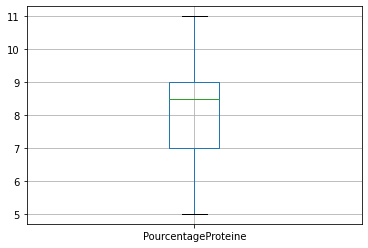

In [98]:
df_ratioProteine_Poids_Avoine.boxplot('PourcentageProteine', showfliers=False);

#### Selon les ressources (Wikipédia), l'avoine contient 10.7% de protéine. D'après les claculs, nous trouvons un pourcentage de 8.15%. L'ordre de grandeur est respecté. Le calcul est cohérent.

## Question 5 : Citez 5 aliments parmi les 20 aliments les plus caloriques, en utilisant le ratio énergie/poids. 

In [99]:
# Suppression des colonnes non indispensables du dataframe
df_ratio_EnergyPoids.drop(['Unity', 'Value','Population'], axis=1 ,inplace=True)

In [100]:
df_ratio_EnergyPoids[df_ratio_EnergyPoids['Ratio_Kcal_Kg']==0]


,Country_code,Country,Product_code,Product,Year,Origine,Disponibilite_pop_kcal,Ratio_Kcal_Kg
10,2,Afghanistan,2761,Poissons Eau Douce,2013,Animal,0.0,0.0
25,2,Afghanistan,2563,Olives,2013,Végétal,0.0,0.0
33,2,Afghanistan,2580,Huile d'Olive,2013,Végétal,0.0,0.0
42,2,Afghanistan,2619,Dattes,2013,Végétal,0.0,0.0
46,2,Afghanistan,2633,Feve de Cacao,2013,Végétal,0.0,0.0
...,...,...,...,...,...,...,...,...
13976,181,Zimbabwe,2613,Pamplemousse,2013,Végétal,0.0,0.0
13977,181,Zimbabwe,2614,"Agrumes, Autres",2013,Végétal,0.0,0.0
13980,181,Zimbabwe,2618,Ananas,2013,Végétal,0.0,0.0
13982,181,Zimbabwe,2620,Raisin,2013,Végétal,0.0,0.0


In [101]:
# Suppression des "Ratio_Kcal_Kg" égaux à 0
df_ratio_EnergyPoids = df_ratio_EnergyPoids.drop(df_ratio_EnergyPoids[df_ratio_EnergyPoids['Ratio_Kcal_Kg'] == 0].index, axis=0)

In [102]:
df_ratio_EnergyPoids.shape

(8975, 8)

In [103]:
# Réinitialisation des index
df_ratio_EnergyPoids = df_ratio_EnergyPoids.reset_index(drop=True)


In [104]:
df_ratioTopCalorique = df_ratio_EnergyPoids.groupby('Product').mean()


In [105]:
# Vérification que la moyenne a fonctionné
df_ratioTopCalorique[df_ratioTopCalorique['Product_code']== 2731]

,Country_code,Product_code,Year,Disponibilite_pop_kcal,Ratio_Kcal_Kg
Product,,,,,
Viande de Bovins,125.51462,2731.0,2013.0,5.891388e+11,1679.369357


In [106]:
# Classement des "Ratio_Kcal_Kg" par ordre décroissant
df_ratioTopCalorique = df_ratioTopCalorique.sort_values('Ratio_Kcal_Kg', ascending=False).head(20)


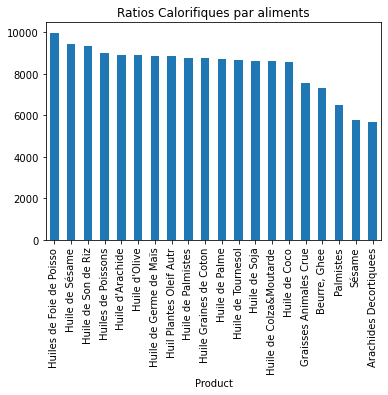

In [107]:
df_ratioTopCalorique['Ratio_Kcal_Kg'].plot(kind='bar', title='Ratios Calorifiques par aliments', legend=None, sort_columns=True);

#### Les cinq aliments les plus calorifiques en utilisant le ratio énergie/poids sont :

In [108]:
# Affichage des 5 aliments les plus calorifiques en utilisant le ratio énergie/poids. 
df_ratioTopCalorique.iloc[:5]

,Country_code,Product_code,Year,Disponibilite_pop_kcal,Ratio_Kcal_Kg
Product,,,,,
Huiles de Foie de Poisso,193.000000,2782.0,2013.0,4.732334e+10,9982.930000
Huile de Sésame,119.200000,2579.0,2013.0,1.841101e+11,9433.745143
Huile de Son de Riz,119.166667,2581.0,2013.0,5.920899e+11,9361.549167
Huiles de Poissons,77.333333,2781.0,2013.0,2.012756e+11,9003.716667
Huile d'Arachide,129.328947,2572.0,2013.0,4.427298e+11,8935.766184


#### Sans surprise, nous retrouvons des huiles dans le palmarès des aliments les plus énergétiques.

### 5.1 Recherche des  5 aliments parmi les 20 aliments les plus riches en protéines :

In [109]:
df_ratioProteine_Poids.head(2)

,Country_code,Country,Product_code,Product,Year,Origine,Population,Disponibilite_pop_kg_prot,Ratio_KgProteine_Kg,PourcentageProteine
0,2,Afghanistan,2731,Viande de Bovins,2013,Animal,30552000,21076297.2,0.15,15.0
1,2,Afghanistan,2732,Viande d'Ovins/Caprins,2013,Animal,30552000,21299326.8,0.14,14.0


In [110]:
# Shape avant suppression des 0
df_ratioProteine_Poids.shape

(8722, 10)

In [111]:
# Suppression des "Ratio_KgProteine_Kg" égaux à 0
df_ratioProteine_Poids = df_ratioProteine_Poids.drop(df_ratioProteine_Poids[df_ratioProteine_Poids['Ratio_KgProteine_Kg'] == 0].index, axis=0)

In [112]:
df_ratioProteine_Poids.shape

(6918, 10)

In [113]:
df_TopRichProt = df_ratioProteine_Poids.groupby('Product').mean()


In [114]:
# Vérification que la moyenne a fonctionné
df_TopRichProt[df_TopRichProt['Product_code']== 2731]

,Country_code,Product_code,Year,Population,Disponibilite_pop_kg_prot,Ratio_KgProteine_Kg,PourcentageProteine
Product,,,,,,,
Viande de Bovins,125.51462,2731.0,2013.0,4.091769e+07,5.283524e+07,0.144795,14.479532


In [115]:
# Classement des "Ratio_KgProteine_Kg" par ordre décroissant
df_TopRichProt = df_TopRichProt.sort_values('Ratio_KgProteine_Kg', ascending=False).head(20)

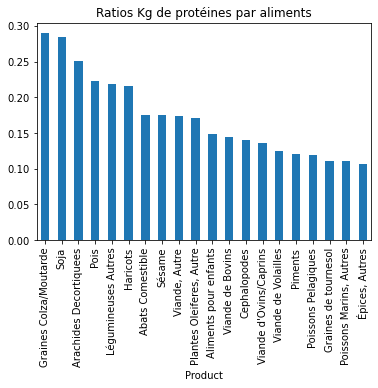

In [116]:
df_TopRichProt['Ratio_KgProteine_Kg'].plot(kind='bar', title='Ratios Kg de protéines par aliments', legend=None, sort_columns=True);

#### Les 5 aliments les plus protéinés sont :

In [117]:
# Affichage des 5 aliments les plus protéinés en utilisant le ratio kg_protéine/poids. 
df_TopRichProt.iloc[:5]

,Country_code,Product_code,Year,Population,Disponibilite_pop_kg_prot,Ratio_KgProteine_Kg,PourcentageProteine
Product,,,,,,,
Graines Colza/Moutarde,33.000000,2558.0,2013.0,3.518200e+07,1.284143e+07,0.290000,29.000000
Soja,134.626506,2555.0,2013.0,7.250643e+07,4.149991e+07,0.284699,28.469880
Arachides Decortiquees,127.615942,2556.0,2013.0,4.923415e+07,2.033977e+07,0.251232,25.123188
Pois,134.162162,2547.0,2013.0,5.691562e+07,1.169065e+07,0.223604,22.360360
Légumineuses Autres,128.507576,2549.0,2013.0,5.059539e+07,4.353251e+07,0.219091,21.909091


#### Les Graines Colza/Moutarde sont les aliments les plus riches en protéines.

## Question 6 : Calcul, pour les produits végétaux uniquement, de la disponibilité intérieure mondiale exprimée en kcal.

In [118]:
# Filtrage sur l'élement Disponibilité intérieure de "df_vegetaux"
df_vegDispoIntKg = df_vegetaux[df_vegetaux['Element']== 'Disponibilité intérieure']

In [119]:
df_vegDispoIntKg.shape

(11673, 10)

In [120]:
df_ratio_EnergyPoids.shape

(8975, 8)

In [121]:
# Filtrage sur "origine"
df_vegRatio_EnergyPoids = df_ratio_EnergyPoids[df_ratio_EnergyPoids['Origine']=='Végétal']

In [122]:
# Fusion des dataframes "df_vegRatio_EnergyPoids" et "df_vegDispoIntKg"
df_vegDispoIntKcalKg = pd.merge(df_vegRatio_EnergyPoids, df_vegDispoIntKg, how='right')

In [123]:
df_vegDispoIntKcalKg.shape

(11673, 12)

In [124]:
# Recherche et suppression des duplicatas 
df_vegDispoIntKcalKg.duplicated(subset=['Product']).sum()
df_vegDispoIntKcalKg = df_vegDispoIntKcalKg.drop_duplicates()

In [125]:
# Valeurs manquantes
df_vegDispoIntKcalKg.isna().sum()
#print(df_vegDispoIntKcalKg.isna().mean(axis=0))
#print(df_vegDispoIntKcalKg.isna().mean(axis=1))

Country_code                 0
Country                      0
Product_code                 0
Product                      0
Year                         0
Origine                      0
Disponibilite_pop_kcal    4989
Ratio_Kcal_Kg             4989
Element_code                 0
Element                      0
Unity                        0
Value                        0
dtype: int64

In [126]:
# suppression des valeurs manquantes NB: une fusion à gauche donne moins de valeurs manquantes => logique !!
df_vegDispoIntKcalKg = df_vegDispoIntKcalKg.dropna()
df_vegDispoIntKcalKg.shape

(6684, 12)

In [127]:
df_vegDispoIntKcalKg['vegDispoInterKcal'] = (df_vegDispoIntKcalKg['Ratio_Kcal_Kg'] * (df_vegDispoIntKcalKg['Value']*1000000))

In [128]:
# Vérification de la création de la colonne "vegDispoInterKcal"
df_vegDispoIntKcalKg.shape

(6684, 13)

In [129]:
# Calcul de la disponibilité intérieure mondiale en kcal de l'ensemble des végétaux
veg_dispoIntWorld = df_vegDispoIntKcalKg['vegDispoInterKcal'].sum()

In [130]:
print('La disponibilité intérieure mondiale en kcal de l\'ensemble des végétaux est de',veg_dispoIntWorld, 'Kcal')

La disponibilité intérieure mondiale en kcal de l'ensemble des végétaux est de 1.231209243418e+16 Kcal


In [131]:
# Vérification des différents dataframes
print(df_vegDispoIntKg.shape)
print(df_ratio_EnergyPoids.shape)
print(df_vegDispoIntKcalKg.shape)

(11673, 10)
(8975, 8)
(6684, 13)


## Question 7 : Combien d'humains pourraient être nourris si toute la disponibilité intérieure mondiale de produits végétaux était utilisée pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

### 7.1 Nombre d'humains nourris - Unité : Kcalorie

#### D'après un rapport de la FAO sur la malnutrition, l'homme a besoin d'un apport de 2800Kcal/jour contre 2000Kcal pour une femme (hors femmes enceintes et allaitantes). Aussi, nous fixerons l'apport journalier pour un humain à 2400 kcal.

#### Nombre d'humains pouvant être nourris si toute la disponibilité intérieure mondiale de produits végétaux était utilisée pour de la nourriture 

In [132]:
nb_humains = veg_dispoIntWorld / (APPORT_JOUR_KCAL * NB_JOURS_ANNEE)
print(round(nb_humains,0), ' humains pourraient être nourris soit ', round(nb_humains/POP_MONDIALE_FAO * 100,2), '% de la population mondiale')

14054900039.0  humains pourraient être nourris soit  200.86 % de la population mondiale


###  7.2 Nombre d'humains nourris - Unité : protéine

#### D'après un rapport de la FAO sur la malnutrition, l'homme a besoin d'un apport de 63 g de protéine par jour contre 50 g pour une femme (hors femmes enceintes et allaitantes). Aussi, nous fixerons l'apport journalier pour un humain à 56 g.

#### Nombre d'humains pouvant être nourris si toute la disponibilité intérieure mondiale de produits végétaux était utilisée pour de la nourriture (en 2013)

In [133]:
# dataframe protéine
df_ratioProteine_Poids.head(2)

,Country_code,Country,Product_code,Product,Year,Origine,Population,Disponibilite_pop_kg_prot,Ratio_KgProteine_Kg,PourcentageProteine
0,2,Afghanistan,2731,Viande de Bovins,2013,Animal,30552000,21076297.2,0.15,15.0
1,2,Afghanistan,2732,Viande d'Ovins/Caprins,2013,Animal,30552000,21299326.8,0.14,14.0


In [134]:
# Filtrage sur "origine"
df_vegRatioProteine_Poids = df_ratioProteine_Poids[df_ratioProteine_Poids['Origine']=='Végétal']

In [135]:
# Fusion des dataframes "df_vegRatioProteine_Poids" et "df_vegDispoIntKg"
df_vegDispoIntProtKg = pd.merge(df_vegRatioProteine_Poids, df_vegDispoIntKg, how='left')

In [136]:
df_vegDispoIntProtKg.shape

(4501, 14)

In [137]:
# Recherche et suppression des duplicatas 
df_vegDispoIntProtKg.duplicated(subset=['Product']).sum()
df_vegDispoIntProtKg = df_vegDispoIntProtKg.drop_duplicates()

In [138]:
# Valeurs manquantes
df_vegDispoIntProtKg.isna().sum()

Country_code                 0
Country                      0
Product_code                 0
Product                      0
Year                         0
Origine                      0
Population                   0
Disponibilite_pop_kg_prot    0
Ratio_KgProteine_Kg          0
PourcentageProteine          0
Element_code                 0
Element                      0
Unity                        0
Value                        0
dtype: int64

In [139]:
# suppression des valeurs manquantes
df_vegDispoIntProtKg = df_vegDispoIntProtKg.dropna(axis=0)
df_vegDispoIntProtKg.shape

(4501, 14)

In [140]:
# Création d'une colonne qui comprend le résultat de la dispo intérieure en kg de protéine
df_vegDispoIntProtKg['vegDispoInterProt'] = (df_vegDispoIntProtKg['Ratio_KgProteine_Kg'] * (df_vegDispoIntProtKg['Value']*1000000))

In [141]:
# Vérification de la création de la colonne "vegDispoInterProt"
df_vegDispoIntProtKg.shape

(4501, 15)

In [142]:
# Calcul de la disponibilité intérieure mondiale en protéine de l'ensemble des végétaux
veg_dispoIntWorldProt = df_vegDispoIntProtKg['vegDispoInterProt'].sum()

In [143]:
print('La disponibilité intérieure mondiale en kg de protéine de l\'ensemble des végétaux est de',veg_dispoIntWorldProt)

La disponibilité intérieure mondiale en kg de protéine de l'ensemble des végétaux est de 286267130000.0


#### Nombre d'humains pouvant être nourris si toute la disponibilité intérieure mondiale de produits végétaux était utilisée pour de la nourriture (en 2013)

In [144]:
nb_humains = veg_dispoIntWorldProt / (APPORT_JOUR_KGPROTEINE * NB_JOURS_ANNEE)
print(round(nb_humains,0), ' humains pourraient être nourris soit ', round(nb_humains/POP_MONDIALE_FAO * 100,2), '% de la population mondiale')

14005241194.0  humains pourraient être nourris soit  200.15 % de la population mondiale


## Question 8 : Combien d'humains pourraient être nourris si toute la disponibilité alimentaire en produits végétaux, la nourriture végétale destinée aux animaux et les pertes de produits végétaux étaient utilisés pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

### 8.1 Nombre d'humains nourris - Unité : Kcal

In [145]:
# Dataframe initiale
df_vegetaux.head(1)

,Country_code,Country,Element_code,Element,Product_code,Product,Year,Unity,Value,Origine
0,2,Afghanistan,5511,Production,2511,Blé,2013,Milliers de tonnes,5169.0,Végétal


In [146]:
# Liste des données dans "Element"
df_vegetaux['Element'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Disponibilité intérieure', 'Semences', 'Pertes', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Aliments pour animaux', 'Exportations - Quantité', 'Traitement',
       'Autres utilisations (non alimentaire)'], dtype=object)

In [147]:
# Disponibilité alimentaire mondiale (Kcal)
vegDispoAlimKcalWorld = df_vegRatio_EnergyPoids['Disponibilite_pop_kcal'].sum()

In [148]:
# Filtrage sur l'élement 'Aliments pour animaux' de "df_vegetaux"
df_vegAlimAnimKg = df_vegetaux[df_vegetaux['Element']== 'Aliments pour animaux']
df_vegAlimAnimKg.shape

(2157, 10)

In [149]:
# Filtrage sur l'élement 'Pertes' de "df_vegetaux"
df_vegPertesKg = df_vegetaux[df_vegetaux['Element']=='Pertes']
df_vegPertesKg.shape

(3876, 10)

In [150]:
df_vegAlimPerteKg = pd.concat([df_vegAlimAnimKg, df_vegPertesKg])
df_vegAlimPerteKg.shape

(6033, 10)

In [151]:
# Fusion des dataframes "df_vegRatio_EnergyPoids" et "df_vegAlimPerteKg" 
df_vegAlimPerteKcalKg = pd.merge(df_vegRatio_EnergyPoids, df_vegAlimPerteKg, how='right')

In [152]:
# Vérification du bon déroulement de la fusion des dataframes "df_vegRatio_EnergyPoids" et "df_vegAlimPerteKg" => Bonne fusion
df_vegAlimPerteKcalKg.duplicated().sum()

0

In [153]:
# Ajout d'une colonne 'df_vegAlimPerteKcalKg' qui comprend les valeurs en KCal
df_vegAlimPerteKcalKg['vegAlimPerteKcalKg'] = (df_vegAlimPerteKcalKg['Ratio_Kcal_Kg'] * (df_vegAlimPerteKcalKg['Value']*1000000))

In [154]:
df_vegAlimPerteKcalKg['vegAlimPerteKcalKg']

0       1.172786e+12
1       1.694025e+11
2       6.162660e+11
3       9.552123e+10
4                NaN
            ...     
6028             NaN
6029    5.738600e+09
6030    4.918800e+08
6031             NaN
6032    5.738600e+08
Name: vegAlimPerteKcalKg, Length: 6033, dtype: float64

In [155]:
df_vegAlimPerteKcalKg.shape

(6033, 13)

In [156]:
# Valeurs manquantes
df_vegAlimPerteKcalKg.isna().sum()

Country_code                 0
Country                      0
Product_code                 0
Product                      0
Year                         0
Origine                      0
Disponibilite_pop_kcal    1487
Ratio_Kcal_Kg             1487
Element_code                 0
Element                      0
Unity                        0
Value                        0
vegAlimPerteKcalKg        1487
dtype: int64

In [157]:
# suppression des valeurs manquantes
df_vegAlimPerteKcalKg = df_vegAlimPerteKcalKg.dropna(axis=0)
df_vegAlimPerteKcalKg.shape

(4546, 13)

In [158]:
vegAlimPerteKcalKgWold = df_vegAlimPerteKcalKg['vegAlimPerteKcalKg'].sum()
print(vegAlimPerteKcalKgWold)

3125044676080000.0


In [159]:
vegNoPerteNourKcalKgWold = vegAlimPerteKcalKgWold + vegDispoAlimKcalWorld
print(vegNoPerteNourKcalKgWold, 'Kcal')

9173263173220000.0 Kcal


In [160]:
nb_humains = vegNoPerteNourKcalKgWold / (APPORT_JOUR_KCAL * NB_JOURS_ANNEE)
print(round(nb_humains,0), ' humains pourraient être nourris soit ', round(nb_humains/POP_MONDIALE_FAO * 100,2), '% de la population mondiale')

10471761613.0  humains pourraient être nourris soit  149.65 % de la population mondiale


### 8.1 Nombre d'humains nourris - Unité : Protéine

In [161]:
# Récupération du dataframe de la Q 7.1 "df_vegRatioProteine_Poids"
df_vegRatioProteine_Poids.head(1)

,Country_code,Country,Product_code,Product,Year,Origine,Population,Disponibilite_pop_kg_prot,Ratio_KgProteine_Kg,PourcentageProteine
11,2,Afghanistan,2511,Blé,2013,Végétal,30552000,411601126.8,0.08,8.0


In [162]:
# Disponibilité alimentaire mondiale (Protéine)
vegDispoAlimProtWold = df_vegRatioProteine_Poids['Disponibilite_pop_kg_prot'].sum()
print(vegDispoAlimProtWold)

123164801708.50002


In [163]:
# Fusion des dataframes "df_vegRatioProteine_Poids" et "df_vegAlimPerteKg" 
df_vegAlimPerteProt = pd.merge(df_vegRatioProteine_Poids, df_vegAlimPerteKg, how='right')

In [164]:
# Vérification du bon déroulement de la fusion des dataframes "df_vegRatio_EnergyPoids" et "df_vegAlimPerteKg" => Bonne fusion
df_vegAlimPerteProt.duplicated().sum()

0

In [165]:
df_vegAlimPerteProt.shape

(6033, 14)

In [166]:
# Ajout d'une colonne 'vegNoPerteNourriKcalKg' qui comprend les valeurs en KCal
df_vegAlimPerteProt['vegAlimPerteProteine'] = (df_vegAlimPerteProt['Ratio_KgProteine_Kg'] * (df_vegAlimPerteProt['Value']*1000000))

In [167]:
df_vegAlimPerteProt.shape

(6033, 15)

In [168]:
# Valeurs manquantes
df_vegAlimPerteProt.isna().sum()

Country_code                    0
Country                         0
Product_code                    0
Product                         0
Year                            0
Origine                         0
Population                   2088
Disponibilite_pop_kg_prot    2088
Ratio_KgProteine_Kg          2088
PourcentageProteine          2088
Element_code                    0
Element                         0
Unity                           0
Value                           0
vegAlimPerteProteine         2088
dtype: int64

In [169]:
# Suppression des valeurs manquantes
df_vegAlimPerteProt = df_vegAlimPerteProt.dropna(axis=0)
df_vegAlimPerteProt.shape

(3945, 15)

In [170]:
vegAlimPerteProtWold = df_vegAlimPerteProt['vegAlimPerteProteine'].sum()
print(vegAlimPerteProtWold, 'kg de protéine')

77928960000.0 kg de protéine


In [171]:
vegNoPerteNourProtWold = vegAlimPerteProtWold + vegDispoAlimProtWold
print(vegNoPerteNourProtWold, 'kg de protéine')

201093761708.5 kg de protéine


In [172]:
nb_humains = vegNoPerteNourProtWold / (APPORT_JOUR_KGPROTEINE * NB_JOURS_ANNEE)
print(round(nb_humains,0), ' humains pourraient être nourris soit ', round(nb_humains/POP_MONDIALE_FAO * 100,2), '% de la population mondiale')

9838246659.0  humains pourraient être nourris soit  140.6 % de la population mondiale


## Question 9 : Combien d'humains pourraient être nourris avec la disponibilité alimentaire mondiale ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

### 9.1 Nombre d'humains nourris - Unité : Kcal

In [173]:
# Disponibilité alimentaire mondiale => frame Q3 "df_ani_veg_dispo_kcal" et "df_ratio_EnergyPoids"

In [174]:
# Disponibilité alimentaire mondiale en kcal donc prise en compte de végétal ET animal
df_ratio_EnergyPoids.head(1)

,Country_code,Country,Product_code,Product,Year,Origine,Disponibilite_pop_kcal,Ratio_Kcal_Kg
0,2,Afghanistan,2731,Viande de Bovins,2013,Animal,3.010900e+11,2150.64


In [175]:
# Total de la disponibilité alimentaire mondiale en kcal
ani_vegDispoAlimKalWold = df_ratio_EnergyPoids['Disponibilite_pop_kcal'].sum()
print(ani_vegDispoAlimKalWold, 'kcal')

7360354597265000.0 kcal


In [176]:
# Nombre d'humains nourris avec la disponibilité alimentaire mondiale (kcal)
nb_humains = ani_vegDispoAlimKalWold / (APPORT_JOUR_KCAL * NB_JOURS_ANNEE)
print(round(nb_humains,0), ' humains pourraient être nourris soit ', round(nb_humains/POP_MONDIALE_FAO * 100,2), '% de la population mondiale')

8402231275.0  humains pourraient être nourris soit  120.08 % de la population mondiale


### 9.2 Nombre d'humains nourris - Unité : Protéine

In [177]:
# Disponibilité alimentaire mondiale en protéine donc prise en compte de végétal ET animal
df_ratioProteine_Poids.head(1)

,Country_code,Country,Product_code,Product,Year,Origine,Population,Disponibilite_pop_kg_prot,Ratio_KgProteine_Kg,PourcentageProteine
0,2,Afghanistan,2731,Viande de Bovins,2013,Animal,30552000,21076297.2,0.15,15.0


In [178]:
#Total de la disponibilité alimentaire mondiale en kg de protéines
ani_vegDispoAlimProtWold = df_ratioProteine_Poids['Disponibilite_pop_kg_prot'].sum()
print(ani_vegDispoAlimProtWold, 'kg de protéines')

205189574741.55002 kg de protéines


In [179]:
nb_humains = ani_vegDispoAlimProtWold / (APPORT_JOUR_KGPROTEINE * NB_JOURS_ANNEE)
print(round(nb_humains,0), ' humains pourraient être nourris soit ', round(nb_humains/POP_MONDIALE_FAO * 100,2), '% de la population mondiale')

10038628901.0  humains pourraient être nourris soit  143.46 % de la population mondiale


## Question 10 : A partir des données téléchargées qui concernent la sous-nutrition, répondez à cette question : Quelle proportion de la population mondiale est considérée comme étant en sous-nutrition ?

In [180]:
# Dataframe de la sous alimentation
df_sousAlimentation.head(2)

,Country_code,Country,Product_code,Product,Year,Unity,Value,is_sousAlim
0,2,Afghanistan,210011,Nombre de personnes sous-alimentées (millions)...,2013,millions,7.9,True
1,2,Afghanistan,210011,Nombre de personnes sous-alimentées (millions)...,2014,millions,8.8,True


In [181]:
# Création d'u filtre pour n'avoir que les données de 2013
df_sousAlimFiltYear = df_sousAlimentation['Year']== 2013
df_sousAlimFao = df_sousAlimentation[df_sousAlimFiltYear]

In [182]:
df_sousAlimFao = df_sousAlimFao.reset_index(drop=True)


In [183]:
# Total des personnes sous alimentées
nbPersSsAlimFao = df_sousAlimFao['Value'].sum()  * 1000000
print('Nbre de personnes sous alimentées : ',nbPersSsAlimFao,' soit',round(nbPersSsAlimFao/POP_MONDIALE_FAO * 100,2),'% de la population mondiale en 2013')

Nbre de personnes sous alimentées :  743700000.0  soit 10.63 % de la population mondiale en 2013


### 10.1 Établissez la liste des produits (ainsi que leur code) considérés comme des céréales selon la FAO.

In [184]:
# table céréales
df_cereales.head(1)

,Country_code,Country,Element_code,Element,Product_code,Product,Year,Unity,Value,Origine
0,2,Afghanistan,5511,Production,2511,Blé,2013,Milliers de tonnes,5169,Céréale


In [185]:
# Liste des produits avec code considérés comme des céréales selon la FAO:
df_cerealesCodeFao = df_cereales.loc[:,['Product_code','Product']]

In [186]:
df_cerealesCodeFao.shape

(891, 2)

In [187]:
df_ani_veg.shape

(140919, 10)

### Repérez dans vos données les informations concernant les céréales (par exemple en créant une colonne de type booléen nommée "is_cereal").

In [188]:
df_cerealesCodeFao.head(1)

,Product_code,Product
0,2511,Blé


In [189]:
df_ani_veg['Product_code'].dtypes

dtype('int64')

In [190]:
# création de la colonne 'is_cereal' (mise à True) dans le dataframe df_cerealesCodeFao
df_cerealesCodeFao['is_cereal'] = 'True'

In [191]:
# Vérification du type de données dans 'df_cerealesCodeFao'
df_cerealesCodeFao.dtypes

Product_code     int64
Product         object
is_cereal       object
dtype: object

In [192]:
# Message d'erreur float et int incompatibilité???? => convertion
# Convertion de la colonne 'Product_code' de "df_cerealesCodeFao" en float pour une meilleure fusion
df_cerealesCodeFao['Product_code'] = df_cerealesCodeFao['Product_code'].astype(float)

In [193]:
# Vérification du bon fonctionnement de la convertion
df_cerealesCodeFao.dtypes

Product_code    float64
Product          object
is_cereal        object
dtype: object

In [194]:
#Fusion des dataframes 'df_vegetaux' et 'df_cerealesCodeFao'
df_cereaVegAni = df_ani_veg.merge(df_cerealesCodeFao, how='left', on=['Product_code','Product' ])

In [195]:
# Nouvel index du dataframe 'df_cereaVeg'
df_cereaVegAni = df_cereaVegAni.reset_index(drop=True)

In [196]:
# Vérification de la donnée dans la colonne 'is_céréal' d'un végétal qui n'est pas une céréale => qui n'est pas True
df_cereaVegAni.loc[df_cereaVegAni['Product_code'] == 2546, 'is_cereal']

55985      NaN
55986      NaN
55987      NaN
55988      NaN
55989      NaN
          ... 
1767621    NaN
1767622    NaN
1767623    NaN
1767624    NaN
1767625    NaN
Name: is_cereal, Length: 1730, dtype: object

In [197]:
df_cereaVegAni['is_cereal'].describe()

count     1643121
unique          1
top          True
freq      1643121
Name: is_cereal, dtype: object

In [198]:
# Vérification de l'existence de valeurs NaN
df_cereaVegAni.isna().mean()

Country_code    0.00000
Country         0.00000
Element_code    0.00000
Element         0.00000
Product_code    0.00000
Product         0.00000
Year            0.00000
Unity           0.00000
Value           0.00000
Origine         0.00000
is_cereal       0.07069
dtype: float64

In [199]:
df_cereaVegAni.shape

(1768109, 11)

In [200]:
df_cerealesCodeFao.shape

(891, 3)

In [201]:
df_ani_veg.shape

(140919, 10)

In [202]:
# Suppression des duplicates
df_cereaVegAni.drop_duplicates(inplace=True)

In [203]:
# Remplissage par' False' des NaN de la colonne 'is_cereal' (ne correspondant pas à une céréale selon la FAO)
df_cereaVegAni['is_cereal'].fillna(False, inplace=True)

In [204]:
df_cereaVegAni['is_cereal'].describe()

count     140919
unique         2
top        False
freq      124988
Name: is_cereal, dtype: object

In [205]:
# Vérification du bon fonctionnement de la colonne "is_cereal" par ex avec le haricot
df_cereaVegAni.loc[df_cereaVegAni['Product_code'] == 2546, 'is_cereal']

55985      False
55986      False
55987      False
55988      False
55989      False
           ...  
1767621    False
1767622    False
1767623    False
1767624    False
1767625    False
Name: is_cereal, Length: 1730, dtype: object

## Question 11 : En ne prenant en compte que les céréales destinées à l'alimentation (humaine et animale), quelle proportion (en termes de poids) est destinée à l'alimentation animale ? 

In [206]:
df_cereaVegAni['Element'].unique()

array(['Production', 'Importations - Quantité',
       'Disponibilité intérieure', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Semences', 'Pertes', 'Exportations - Quantité',
       'Aliments pour animaux', 'Autres utilisations (non alimentaire)',
       'Variation de stock', 'Traitement'], dtype=object)

In [207]:
df_cerealesCodeFao.columns

Index(['Product_code', 'Product', 'is_cereal'], dtype='object')

In [208]:
# Filtre céréales destinées à l'alimentation (humaine et animale) => df_cereaVeg['is_cereal'] == 'True'
df_cereaAlimAllFilt = df_cereaVegAni['is_cereal'] == 'True'
df_cereaAlimAll = df_cereaVegAni[df_cereaAlimAllFilt]

In [209]:
# Filtre sur 'Aliments pour animaux' et 'Nourriture' de 'df_cereaVeg'
elements_to_keep = ['Aliments pour animaux', 'Nourriture']
elements_filter = df_cereaAlimAll['Element'].isin(elements_to_keep)
df_cereaAlimAll = df_cereaAlimAll[elements_filter]

In [210]:
# Intégration du nombre d'habitants au dataframe 'df_cereaAlimAll'
df_cereaAlimAll = pd.merge(df_cereaAlimAll,df_population)

In [211]:
# Calcul du poids de chaque céréale pour l'alimentation animale 
df_cereaAlimAll['CereaAlimAniKg'] = df_cereaAlimAll[df_cereaAlimAll['Element']== 'Aliments pour animaux']['Value'] * 1000000

In [212]:
# Calcul du poids total des céréales pour l'alimentation animale 
totalCereaAlimAniKg = df_cereaAlimAll['CereaAlimAniKg'].sum()
print("Poids total des céréales pour l'alimentation animale", totalCereaAlimAniKg)

Poids total des céréales pour l'alimentation animale 873535000000.0


In [213]:
# Calcul du poids des céréales pour l'alimentation humaine dans une colonne nommée 'CereaNourriHumKg'
df_cereaAlimAll['CereaNourriHumKg'] = df_cereaAlimAll[df_cereaAlimAll['Element']== 'Nourriture']['Value'] * 1000000

In [214]:
totalCereNourrHumKg = df_cereaAlimAll['CereaNourriHumKg'].sum()
print("Poids des céréales pour l'alimentation humaine",totalCereNourrHumKg)

Poids des céréales pour l'alimentation humaine 1029010000000.0


In [215]:
# Total du poids céréales destinées à l'alimentation (humaine et animale)
totalCereaAlimAll = totalCereNourrHumKg  + totalCereaAlimAniKg

In [216]:
print('le total du poids céréales destinées à l\'alimentation (humaine et animale)', totalCereaAlimAll, 'Kg')

le total du poids céréales destinées à l'alimentation (humaine et animale) 1902545000000.0 Kg


In [217]:
print('L\' alimentation animale en céréales représente une proportion de ',round(totalCereaAlimAniKg / totalCereaAlimAll * 100, 2), '%')

L' alimentation animale en céréales représente une proportion de  45.91 %


In [218]:
print('L\' alimentation humaine en céréales représente une proportion de ',round(totalCereNourrHumKg / totalCereaAlimAll * 100, 2), '%')

L' alimentation humaine en céréales représente une proportion de  54.09 %


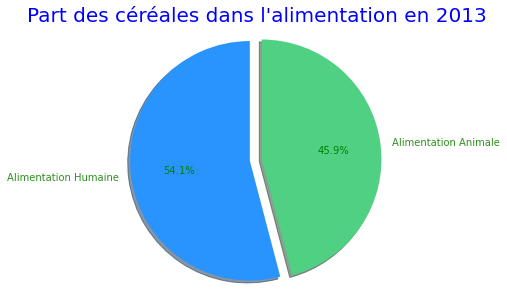

In [219]:
# Pie chart
labels = ['Alimentation Humaine', 'Alimentation Animale']
sizes = [54.09, 45.91]
#colors
colors = ['#2994FE','#50D083']

explode = (0.1, 0)
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, explode=explode, colors = colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
for text in texts:
    text.set_color('#2E911F')
for autotext in autotexts:
    autotext.set_color('green')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Part des céréales dans l\'alimentation en 2013', color='blue', fontsize=20)
plt.show()

### 11.1 Sélectionnez, parmi les données des bilans alimentaires, les informations relatives aux pays dans lesquels la FAO recense des personnes en sous-nutrition.

In [220]:
# Création d'une colonne en_sousAlim
# Récupérer les colonnes qui intéressent 
# fusion

In [221]:
# Récupération des colonnes pertinentes du dataframe 'df_sousAlimFao'
df_sousAlimFao = df_sousAlimFao.loc[:,['Country_code','Country', 'is_sousAlim']]


In [222]:
# Fusion de 'df_sousAlimentation' et 'df_cereaVegAni'
df_popVegAniSous = pd.merge(df_sousAlimFao, df_cereaVegAni, how='right')

In [223]:
# Ré indexage
df_popVegAniSous = df_popVegAniSous.reset_index(drop=True)

In [224]:
df_popVegAniSous.shape

(140919, 12)

In [225]:
# Suppression des duplicates
df_popVegAniSous.drop_duplicates(inplace=True)

In [226]:
# Remplissage des NaN  par 'False' de la colonne 'is_sousAlim' (ne correspondant pas à un pays sous alimenté)
df_popVegAniSous['is_sousAlim'].fillna(False, inplace=True)

In [227]:
df_popVegAniSous['is_sousAlim'].describe()

count     140919
unique         2
top         True
freq       77055
Name: is_sousAlim, dtype: object

In [228]:
df_sousAlimFao.shape

(96, 3)

In [229]:
df_cereaVegAni.shape

(140919, 11)

In [230]:
# Vérification du bon fonctionnement de la colonne "is_sousAlim" par ex avec la France
df_popVegAniSous.loc[df_popVegAniSous['Country'] == 'France', 'is_sousAlim']

49414    False
49415    False
49416    False
49417    False
49418    False
         ...  
50351    False
50352    False
50353    False
50354    False
50355    False
Name: is_sousAlim, Length: 942, dtype: object

### 11.2 Repérez les 15 produits les plus exportés par ce groupe de pays.

In [231]:
# Dataframe de travail
df_popVegAniSous.head(2)

,Country_code,Country,is_sousAlim,Element_code,Element,Product_code,Product,Year,Unity,Value,Origine,is_cereal
0,2,Afghanistan,True,5511,Production,2731,Viande de Bovins,2013,Milliers de tonnes,134.0,Animal,False
1,2,Afghanistan,True,5611,Importations - Quantité,2731,Viande de Bovins,2013,Milliers de tonnes,6.0,Animal,False


In [232]:
# Affichage des intitulés dans la colonne 'Element'
df_popVegAniSous['Element'].unique()

array(['Production', 'Importations - Quantité',
       'Disponibilité intérieure', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Semences', 'Pertes', 'Exportations - Quantité',
       'Aliments pour animaux', 'Autres utilisations (non alimentaire)',
       'Variation de stock', 'Traitement'], dtype=object)

In [233]:
# Filtre sur les pays en sous alimentation : 'is_sousAlim' == 'True' et sur les exportations
df_SousExport = df_popVegAniSous[df_popVegAniSous['is_sousAlim'] == 'True']
df_SousExport = df_SousExport[df_SousExport['Element'] == 'Exportations - Quantité']

In [234]:
#Re indexage
df_SousExport = df_SousExport.reset_index(drop=True)

In [235]:
df_SousExport.shape

(6624, 12)

In [236]:
# Suppression des "Value" égales à 0
df_SousExport = df_SousExport.drop(df_SousExport[df_SousExport['Value'] == 0].index, axis=0)

In [237]:
df_SousExport.shape

(2824, 12)

In [238]:
df_SousExport = df_SousExport.reset_index(drop=True)

In [239]:
# Somme des exportations des pays sous alimentés
df_SousTop15Export = df_SousExport.groupby('Product')[['Value']].sum()
df_SousTop15Export.head(5)


,Value
Product,
Abats Comestible,295.0
"Agrumes, Autres",522.0
"Alcool, non Comestible",2118.0
Aliments pour enfants,182.0
Ananas,6407.0


In [240]:
# Les 15 exportations les plus importantes sont :
# Classement des valeurs par ordre croissant
df_SousTop15Export = df_SousTop15Export.sort_values('Value', axis = 0, ascending=False).head(20)

# Récupération des 15 premières valeurs
df_SousTop15Export = df_SousTop15Export.iloc[:15, :]
df_SousTop15Export.head(15)

,Value
Product,
Huile de Palme,46285.0
Maïs,37888.0
Manioc,35843.0
Riz (Eq Blanchi),32787.0
Sucre Eq Brut,25237.0
Blé,24841.0
"Légumes, Autres",19948.0
Bananes,17805.0
"Fruits, Autres",14590.0


In [241]:
df_SousTop15Export.index

Index(['Huile de Palme', 'Maïs', 'Manioc', 'Riz (Eq Blanchi)', 'Sucre Eq Brut',
       'Blé', 'Légumes, Autres', 'Bananes', 'Fruits, Autres',
       'Lait - Excl Beurre', 'Soja', 'Poissons Pelagiques', 'Tomates',
       'Pommes', 'Oranges, Mandarines'],
      dtype='object', name='Product')

### 11.3 Parmi les données des bilans alimentaires au niveau mondial, sélectionnez les 200 plus grandes importations de ces produits (1 importation = une quantité d'un produit donné importée par un pays donné)

In [242]:
# df_SousTopExport : dataframe des 15 plus grandes exportations
# on veut les + gdes importations de CES produits au niveau mondial
# df_popVegAniSous pour le dataframe mondial

In [243]:
df_popVegAniSous.head(2)

,Country_code,Country,is_sousAlim,Element_code,Element,Product_code,Product,Year,Unity,Value,Origine,is_cereal
0,2,Afghanistan,True,5511,Production,2731,Viande de Bovins,2013,Milliers de tonnes,134.0,Animal,False
1,2,Afghanistan,True,5611,Importations - Quantité,2731,Viande de Bovins,2013,Milliers de tonnes,6.0,Animal,False


In [244]:
df_SousTop15Export.index

Index(['Huile de Palme', 'Maïs', 'Manioc', 'Riz (Eq Blanchi)', 'Sucre Eq Brut',
       'Blé', 'Légumes, Autres', 'Bananes', 'Fruits, Autres',
       'Lait - Excl Beurre', 'Soja', 'Poissons Pelagiques', 'Tomates',
       'Pommes', 'Oranges, Mandarines'],
      dtype='object', name='Product')

In [245]:
# Filtre sur les 15 produits dans le dataframe principal 'df_popVegAniSous'
df_popVegAniSous15Export = df_popVegAniSous[df_popVegAniSous['Product'].isin(df_SousTop15Export.index.map(str))]

In [246]:
df_popVegAniSous15Export.head(2)

,Country_code,Country,is_sousAlim,Element_code,Element,Product_code,Product,Year,Unity,Value,Origine,is_cereal
71,2,Afghanistan,True,5511,Production,2848,Lait - Excl Beurre,2013,Milliers de tonnes,1835.0,Animal,False
72,2,Afghanistan,True,5611,Importations - Quantité,2848,Lait - Excl Beurre,2013,Milliers de tonnes,248.0,Animal,False


In [247]:
df_popVegAniSous15Export.shape

(27612, 12)

In [248]:
df_popVegAniSous15Export = df_popVegAniSous15Export.reset_index(drop=True)

In [249]:
df_popVegAniSous15Export['Product'].unique()

array(['Lait - Excl Beurre', 'Blé', 'Riz (Eq Blanchi)', 'Maïs',
       'Sucre Eq Brut', 'Huile de Palme', 'Tomates', 'Légumes, Autres',
       'Oranges, Mandarines', 'Bananes', 'Pommes', 'Fruits, Autres',
       'Poissons Pelagiques', 'Manioc', 'Soja'], dtype=object)

In [250]:
df_popVegAniSous15Export.columns

Index(['Country_code', 'Country', 'is_sousAlim', 'Element_code', 'Element',
       'Product_code', 'Product', 'Year', 'Unity', 'Value', 'Origine',
       'is_cereal'],
      dtype='object')

In [251]:
# Pour résoudre la question 11, on applique un 'pivot-table' sur 'df_popVegAniSous15Export': Element devient colonne
df_popVegAniSous15EPiv = pd.pivot_table(df_popVegAniSous15Export, values='Value', index=['Country_code', 'Country','Year', 'Product_code', 'Product', 'Origine', 'is_cereal', 'is_sousAlim'], columns='Element', aggfunc='sum')

In [252]:
# Pour une meilleure lisibilité, renommage des colonnes:
df_popVegAniSous15EPiv = df_popVegAniSous15EPiv.rename({'Aliments pour animaux':'Aliments pour animaux (milliers de tonnes)',
                'Autres utilisations (non alimentaire)':'Autres utilisations (non alimentaire)(milliers de tonnes)',
                'Disponibilité alimentaire (Kcal/personne/jour)':'Disponibilité alimentaire (Kcal/personne/jour)',
                'Disponibilité alimentaire en quantité (kg/personne/an)' : 'Disponibilité alimentaire en quantité (kg/personne/an)',
                'Disponibilité de matière grasse en quantité (g/personne/jour':'Disponibilité de matière grasse en quantité (g/personne/jour',
                'Disponibilité de protéines en quantité (g/personne/jour':'Disponibilité de protéines en quantité (g/personne/jour',
                'Disponibilité intérieure' : 'Disponibilité intérieure (milliers de tonnes)',
                'Exportations - Quantité' : 'Exportations - Quantité (milliers de tonnes)',
                'Importations - Quantité' : 'Importations - Quantité (milliers de tonnes)',
                'Nourriture' : 'Nourriture (milliers de tonnes)',
                'Pertes': 'Pertes   (milliers de tonnes)',
                'Production' : 'Production  (milliers de tonnes)',
                'Semences' :'Semences   (milliers de tonnes)',
                'Traitement' : 'Traitement   (milliers de tonnes)',
                'Variation de stock' : 'Variation de stock   (milliers de tonnes)'},axis=1)               
                
                
                             
                                                    
                                  
                                  
                              

In [253]:
df_popVegAniSous15EPiv.head(2)

Element                                                                       Aliments pour animaux (milliers de tonnes)  \
Country_code Country Year Product_code Product Origine is_cereal is_sousAlim                                               
1            Arménie 2013 2511         Blé     Végétal True      True                                               93.0   
                          2514         Maïs    Végétal True      True                                               96.0   

Element                                                                       Autres utilisations (non alimentaire)(milliers de tonnes)  \
Country_code Country Year Product_code Product Origine is_cereal is_sousAlim                                                              
1            Arménie 2013 2511         Blé     Végétal True      True                                                       0.0           
                          2514         Maïs    Végétal True      True                                                       NaN           

Element                                                                       Disponibilité alimentaire (Kcal/personne/jour)  \
Country_code Country Year Product_code Product Origine is_cereal is_sousAlim                                                   
1            Arménie 2013 2511         Blé     Végétal True      True                                                 1024.0   
                          2514         Maïs    Végétal True      True                                                    0.0   

Element                                                                       Disponibilité alimentaire en quantité (kg/personne/an)  \
Country_code Country Year Product_code Product Origine is_cereal is_sousAlim                                                           
1            Arménie 2013 2511         Blé     Végétal True      True                                                    130.60        
                          2514         Maïs    Végétal True      True                                                      0.03        

Element                                                                       Disponibilité de matière grasse en quantité (g/personne/jour)  \
Country_code Country Year Product_code Product Origine is_cereal is_sousAlim                                                                  
1            Arménie 2013 2511         Blé     Végétal True      True                                                       3.6               
                          2514         Maïs    Végétal True      True                                                       NaN               

Element                                                                       Disponibilité de protéines en quantité (g/personne/jour)  \
Country_code Country Year Product_code Product Origine is_cereal is_sousAlim                                                             
1            Arménie 2013 2511         Blé     Végétal True      True                                                     30.52          
                          2514         Maïs    Végétal True      True                                                      0.01          

Element                                                                       Disponibilité intérieure (milliers de tonnes)  \
Country_code Country Year Product_code Product Origine is_cereal is_sousAlim                                                  
1            Arménie 2013 2511         Blé     Végétal True      True                                                 554.0   
                          2514         Maïs    Végétal True      True                                                 102.0   

Element                                                                       Exportations - Quantité (milliers de tonnes)  \
Country_code Country Year Product_code Product Origine is_cereal is_sousAlim                                                 
1

In [254]:
df_popVegAniSous15EPiv.columns

Index(['Aliments pour animaux (milliers de tonnes)',
       'Autres utilisations (non alimentaire)(milliers de tonnes)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure (milliers de tonnes)',
       'Exportations - Quantité (milliers de tonnes)',
       'Importations - Quantité (milliers de tonnes)',
       'Nourriture (milliers de tonnes)', 'Pertes   (milliers de tonnes)',
       'Production  (milliers de tonnes)', 'Semences   (milliers de tonnes)',
       'Traitement   (milliers de tonnes)',
       'Variation de stock   (milliers de tonnes)'],
      dtype='object', name='Element')

In [255]:
df_popVegAniSous15EPiv.shape

(2582, 15)

In [256]:
#Suppression des valeurs des importations égales à 0
df_popVegAniSous15EPiv = df_popVegAniSous15EPiv.drop(df_popVegAniSous15EPiv[df_popVegAniSous15EPiv['Importations - Quantité (milliers de tonnes)'] == 0].index, axis=0)

In [257]:
df_popVegAniSous15EPiv.shape

(2284, 15)

In [258]:
# Classement des valeurs importations par ordre décroissant
df_popVegAniSous15IPiv = df_popVegAniSous15EPiv.sort_values('Importations - Quantité (milliers de tonnes)', axis = 0, ascending=False)

In [259]:
df_popVegAniSous15IPiv.head(2)

Element                                                                                   Aliments pour animaux (milliers de tonnes)  \
Country_code Country             Year Product_code Product Origine is_cereal is_sousAlim                                               
41           Chine, continentale 2013 2555         Soja    Végétal False     True                                             9530.0   
                                      2532         Manioc  Végétal False     True                                            22868.0   

Element                                                                                   Autres utilisations (non alimentaire)(milliers de tonnes)  \
Country_code Country             Year Product_code Product Origine is_cereal is_sousAlim                                                              
41           Chine, continentale 2013 2555         Soja    Végétal False     True                                                       NaN           
                                      2532         Manioc  Végétal False     True                                                    7940.0           

Element                                                                                   Disponibilité alimentaire (Kcal/personne/jour)  \
Country_code Country             Year Product_code Product Origine is_cereal is_sousAlim                                                   
41           Chine, continentale 2013 2555         Soja    Végétal False     True                                                   35.0   
                                      2532         Manioc  Végétal False     True                                                    6.0   

Element                                                                                   Disponibilité alimentaire en quantité (kg/personne/an)  \
Country_code Country             Year Product_code Product Origine is_cereal is_sousAlim                                                           
41           Chine, continentale 2013 2555         Soja    Végétal False     True                                                      3.66        
                                      2532         Manioc  Végétal False     True                                                      1.91        

Element                                                                                   Disponibilité de matière grasse en quantité (g/personne/jour)  \
Country_code Country             Year Product_code Product Origine is_cereal is_sousAlim                                                                  
41           Chine, continentale 2013 2555         Soja    Végétal False     True                                                      1.18               
                                      2532         Manioc  Végétal False     True                                                      0.01               

Element                                                                                   Disponibilité de protéines en quantité (g/personne/jour)  \
Country_code Country             Year Product_code Product Origine is_cereal is_sousAlim                                                             
41           Chine, continentale 2013 2555         Soja    Végétal False     True                                                      3.29          
                                      2532         Manioc  Végétal False     True                                                      0.05          

Element                                                                                   Disponibilité intérieure (milliers de tonnes)  \
Country_code Country             Year Product_code Product Origine is_cereal is_sousAlim                                                  
41           Chine, continentale 2013 2555         Soja    Végétal False     True                                               75081.0   
                                      2532         Manioc

#### Les 200 plus grandes importations des produits exportés par les pays sous alimentés sont :

In [260]:
df_popVegAniSous200IPiv = df_popVegAniSous15IPiv.iloc[:200, :]

In [261]:
df_popVegAniSous200IPiv.head(2)

Element                                                                                   Aliments pour animaux (milliers de tonnes)  \
Country_code Country             Year Product_code Product Origine is_cereal is_sousAlim                                               
41           Chine, continentale 2013 2555         Soja    Végétal False     True                                             9530.0   
                                      2532         Manioc  Végétal False     True                                            22868.0   

Element                                                                                   Autres utilisations (non alimentaire)(milliers de tonnes)  \
Country_code Country             Year Product_code Product Origine is_cereal is_sousAlim                                                              
41           Chine, continentale 2013 2555         Soja    Végétal False     True                                                       NaN           
                                      2532         Manioc  Végétal False     True                                                    7940.0           

Element                                                                                   Disponibilité alimentaire (Kcal/personne/jour)  \
Country_code Country             Year Product_code Product Origine is_cereal is_sousAlim                                                   
41           Chine, continentale 2013 2555         Soja    Végétal False     True                                                   35.0   
                                      2532         Manioc  Végétal False     True                                                    6.0   

Element                                                                                   Disponibilité alimentaire en quantité (kg/personne/an)  \
Country_code Country             Year Product_code Product Origine is_cereal is_sousAlim                                                           
41           Chine, continentale 2013 2555         Soja    Végétal False     True                                                      3.66        
                                      2532         Manioc  Végétal False     True                                                      1.91        

Element                                                                                   Disponibilité de matière grasse en quantité (g/personne/jour)  \
Country_code Country             Year Product_code Product Origine is_cereal is_sousAlim                                                                  
41           Chine, continentale 2013 2555         Soja    Végétal False     True                                                      1.18               
                                      2532         Manioc  Végétal False     True                                                      0.01               

Element                                                                                   Disponibilité de protéines en quantité (g/personne/jour)  \
Country_code Country             Year Product_code Product Origine is_cereal is_sousAlim                                                             
41           Chine, continentale 2013 2555         Soja    Végétal False     True                                                      3.29          
                                      2532         Manioc  Végétal False     True                                                      0.05          

Element                                                                                   Disponibilité intérieure (milliers de tonnes)  \
Country_code Country             Year Product_code Product Origine is_cereal is_sousAlim                                                  
41           Chine, continentale 2013 2555         Soja    Végétal False     True                                               75081.0   
                                      2532         Manioc

### 11.4 Groupez ces importations par produit, afin d'avoir une table contenant 1 ligne pour chacun des 15 produits. Ensuite, calculez pour chaque produit les 2 quantités suivantes :

In [262]:
df_popVegAniSous200PPiv = df_popVegAniSous200IPiv.groupby(by=['Product_code','Product']).sum()

In [263]:
df_popVegAniSous200PPiv.head(15)

,Element,Aliments pour animaux (milliers de tonnes),Autres utilisations (non alimentaire)(milliers de tonnes),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure (milliers de tonnes),Exportations - Quantité (milliers de tonnes),Importations - Quantité (milliers de tonnes),Nourriture (milliers de tonnes),Pertes (milliers de tonnes),Production (milliers de tonnes),Semences (milliers de tonnes),Traitement (milliers de tonnes),Variation de stock (milliers de tonnes)
Product_code,Product,,,,,,,,,,,,,,,
2511,Blé,98103.0,15047.0,30702.0,3948.18,134.51,932.04,456475.0,105355.0,147576.0,300771.0,16062.0,420350.0,20576.0,5964.0,-6101.0
2514,Maïs,402885.0,182117.0,4718.0,591.29,40.41,111.70,701068.0,31260.0,102451.0,55918.0,18268.0,675213.0,3148.0,38735.0,-45339.0
2532,Manioc,25149.0,20355.0,178.0,62.04,0.36,0.89,67326.0,26157.0,34655.0,15257.0,4759.0,58765.0,0.0,1804.0,63.0
2542,Sucre Eq Brut,0.0,2996.0,3882.0,397.65,0.00,0.00,78453.0,6807.0,34208.0,64971.0,64.0,55692.0,0.0,10421.0,-4641.0
2555,Soja,13710.0,524.0,337.0,43.04,14.88,33.02,159570.0,41267.0,93455.0,7510.0,1777.0,107388.0,3596.0,132454.0,-4.0
2577,Huile de Palme,0.0,18568.0,755.0,32.06,85.37,0.23,25618.0,22878.0,29747.0,6833.0,224.0,19446.0,0.0,3.0,-698.0
2601,Tomates,0.0,0.0,65.0,126.30,0.73,3.04,21277.0,2372.0,7143.0,20252.0,1026.0,16053.0,0.0,0.0,452.0
2605,"Légumes, Autres",3980.0,0.0,734.0,939.21,5.91,34.23,87101.0,13895.0,28177.0,75711.0,7272.0,72802.0,30.0,160.0,17.0
2611,"Oranges, Mandarines",0.0,1.0,175.0,275.78,0.52,2.92,19534.0,9990.0,22945.0,19192.0,341.0,7534.0,0.0,0.0,-957.0


In [264]:
df_popVegAniSous200PPiv.shape

(15, 15)

### 11.5 Ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure.

In [265]:
# Création d'une nouvelle colonne 'RatioAutUtilDispoInter' dans le dataframe p3 
df_popVegAniSous200PPiv['RatioAutresUtil/DispoInterieure'] = df_popVegAniSous200PPiv['Autres utilisations (non alimentaire)(milliers de tonnes)']/df_popVegAniSous200PPiv['Disponibilité intérieure (milliers de tonnes)']

In [266]:
# vérification de la création de la nouvelle colonne
df_popVegAniSous200PPiv.head(1)

,Element,Aliments pour animaux (milliers de tonnes),Autres utilisations (non alimentaire)(milliers de tonnes),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure (milliers de tonnes),Exportations - Quantité (milliers de tonnes),Importations - Quantité (milliers de tonnes),Nourriture (milliers de tonnes),Pertes (milliers de tonnes),Production (milliers de tonnes),Semences (milliers de tonnes),Traitement (milliers de tonnes),Variation de stock (milliers de tonnes),RatioAutresUtil/DispoInterieure
Product_code,Product,,,,,,,,,,,,,,,,
2511,Blé,98103.0,15047.0,30702.0,3948.18,134.51,932.04,456475.0,105355.0,147576.0,300771.0,16062.0,420350.0,20576.0,5964.0,-6101.0,0.032963


In [267]:
df_popVegAniSous200PPiv['Aliments pour animaux (milliers de tonnes)' ].dtypes

dtype('float64')

### 11.6 Ratio entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale + humaine)

In [268]:
# Création d'une nouvelle colonne 'RatioNourriAnim/nourriture(Ani+Humaine)' dans le dataframe p3 
df_popVegAniSous200PPiv['RatioNourriAnim/nourriture(Ani+Humaine)'] = df_popVegAniSous200PPiv['Aliments pour animaux (milliers de tonnes)']/(df_popVegAniSous200PPiv['Nourriture (milliers de tonnes)'] + df_popVegAniSous200PPiv['Aliments pour animaux (milliers de tonnes)'])

In [269]:
# Vérification de la création de la nouvelle colonne
df_popVegAniSous200PPiv.head(1)

,Element,Aliments pour animaux (milliers de tonnes),Autres utilisations (non alimentaire)(milliers de tonnes),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure (milliers de tonnes),Exportations - Quantité (milliers de tonnes),Importations - Quantité (milliers de tonnes),Nourriture (milliers de tonnes),Pertes (milliers de tonnes),Production (milliers de tonnes),Semences (milliers de tonnes),Traitement (milliers de tonnes),Variation de stock (milliers de tonnes),RatioAutresUtil/DispoInterieure,RatioNourriAnim/nourriture(Ani+Humaine)
Product_code,Product,,,,,,,,,,,,,,,,,
2511,Blé,98103.0,15047.0,30702.0,3948.18,134.51,932.04,456475.0,105355.0,147576.0,300771.0,16062.0,420350.0,20576.0,5964.0,-6101.0,0.032963,0.24595


## Question 12 : Donnez les 3 produits qui ont la plus grande valeur pour chacun des 2 ratios (vous aurez donc 6 produits à citer) :

### 12.1 Pour le ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure, les produits sont :

In [270]:
# Tri par ordre décroissant de la colonne 'RatioAutresUtil/DispoInterieure' et récupération des 3 premiers ratios
df_popVegAniSous200PPivT = df_popVegAniSous200PPiv.sort_values('RatioAutresUtil/DispoInterieure', axis = 0, ascending=False)#.iloc[0:3, :]

In [271]:
# Les 3 produits avec le plus fort ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure sont :
df_RatioTop3AutDispo200 = df_popVegAniSous200PPivT.loc[:, ['RatioAutresUtil/DispoInterieure']]
df_RatioTop3AutDispo200.head(3)

,Element,RatioAutresUtil/DispoInterieure
Product_code,Product,
2577,Huile de Palme,0.724803
2532,Manioc,0.302335
2514,Maïs,0.259771


### 12.2 Pour le ratio entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale + humaine), les produits sont :

In [272]:
# Tri par ordre décroissant de la colonne 'RatioNourriAnim/nourriture(Ani+Humaine)' et récupération des 3 premiers ratios
df_popVegAniSous200PPivT2 = df_popVegAniSous200PPiv.sort_values('RatioNourriAnim/nourriture(Ani+Humaine)', axis = 0, ascending=False).iloc[0:3, :]

In [273]:
df_popVegAniSous200PPivT2

,Element,Aliments pour animaux (milliers de tonnes),Autres utilisations (non alimentaire)(milliers de tonnes),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure (milliers de tonnes),Exportations - Quantité (milliers de tonnes),Importations - Quantité (milliers de tonnes),Nourriture (milliers de tonnes),Pertes (milliers de tonnes),Production (milliers de tonnes),Semences (milliers de tonnes),Traitement (milliers de tonnes),Variation de stock (milliers de tonnes),RatioAutresUtil/DispoInterieure,RatioNourriAnim/nourriture(Ani+Humaine)
Product_code,Product,,,,,,,,,,,,,,,,,
2514,Maïs,402885.0,182117.0,4718.0,591.29,40.41,111.70,701068.0,31260.0,102451.0,55918.0,18268.0,675213.0,3148.0,38735.0,-45339.0,0.259771,0.878122
2763,Poissons Pelagiques,12156.0,0.0,115.0,36.08,5.01,15.67,16094.0,4602.0,13445.0,3937.0,0.0,7081.0,0.0,0.0,172.0,0.000000,0.755359
2555,Soja,13710.0,524.0,337.0,43.04,14.88,33.02,159570.0,41267.0,93455.0,7510.0,1777.0,107388.0,3596.0,132454.0,-4.0,0.003284,0.646089


In [274]:
# Les 3 produits avec le plus fort ratio entre entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale + humaine) sont :
df_RatioTop3AliNourri200 = df_popVegAniSous200PPivT2.iloc[0:3, 16:17]
# df_RatioTop3AliNourri200.head(3)
df_RatioTop3AliNourri200

,Element,RatioNourriAnim/nourriture(Ani+Humaine)
Product_code,Product,
2514,Maïs,0.878122
2763,Poissons Pelagiques,0.755359
2555,Soja,0.646089


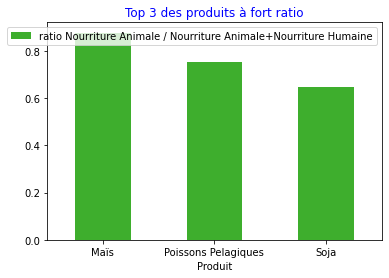

In [275]:
df = pd.DataFrame({'Produit':['Maïs', 'Poissons Pelagiques', 'Soja'], 'ratio Nourriture Animale / Nourriture Animale+Nourriture Humaine':[0.878122, 0.755359, 0.646089]})
ax = df.plot.bar(x='Produit', y='ratio Nourriture Animale / Nourriture Animale+Nourriture Humaine',color='#3EAE2D',rot=0)
plt.title('Top 3 des produits à fort ratio', color='blue')
plt.show()

## Question 13 : Combien de tonnes de céréales pourraient être libérées si les USA diminuaient leur production de produits animaux de 10% ?

In [276]:
df_popVegAniSous['Element'].unique()

array(['Production', 'Importations - Quantité',
       'Disponibilité intérieure', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Semences', 'Pertes', 'Exportations - Quantité',
       'Aliments pour animaux', 'Autres utilisations (non alimentaire)',
       'Variation de stock', 'Traitement'], dtype=object)

In [277]:
# Si les USA diminuent leur production animale de 10%, on peut supposer que l'alimentation animale végétale diminue d'autant
# On calcule donc la quantité de céréales (norme FAO) représentée par cette diminution de l'alimentation animale
# Récupération des données relatives aux USA :
pays_filter = df_popVegAniSous['Country_code'] == 231
elementFilter = df_popVegAniSous['Element'] == 'Aliments pour animaux'
originFilter = df_popVegAniSous['is_cereal'] == 'True'
df_aliAnicereUsa = df_popVegAniSous[pays_filter & elementFilter & originFilter]

In [278]:
# Total alimentation céréales animaux des USA en milliers de tonnes: 
productAniUsa = df_aliAnicereUsa['Value'].sum()

In [279]:
# 10% du total alimentation céréales animaux des USA en milliers de tonnes :
usaProdReduite = productAniUsa *0.1

In [280]:
print('La quantité de céréales pouvant être libérées si les USA diminuaient leur production de produits animaux de 10% est  de :', usaProdReduite * 1000,'tonnes')

La quantité de céréales pouvant être libérées si les USA diminuaient leur production de produits animaux de 10% est  de : 14009600.0 tonnes


In [281]:
# Récupération des ratios pour les USA (dataframe 'df_ratio_EnergyPoids')
pays_filter = df_ratio_EnergyPoids['Country_code'] == 231
originFilter = df_ratio_EnergyPoids['Origine'] == 'Végétal'
df_ratioCereUsa = df_ratio_EnergyPoids[pays_filter & originFilter]

In [282]:
df_ratioCereUsa.shape

(55, 8)

In [283]:
df_ratioCereUsa.columns

Index(['Country_code', 'Country', 'Product_code', 'Product', 'Year', 'Origine',
       'Disponibilite_pop_kcal', 'Ratio_Kcal_Kg'],
      dtype='object')

In [284]:
df_aliAnicereUsa.shape

(8, 12)

In [285]:
df_ratio10Usa = pd.merge(df_ratioCereUsa, df_aliAnicereUsa, how='right')

In [286]:
df_ratio10Usa.isna().sum()

Country_code              0
Country                   0
Product_code              0
Product                   0
Year                      0
Origine                   0
Disponibilite_pop_kcal    1
Ratio_Kcal_Kg             1
is_sousAlim               0
Element_code              0
Element                   0
Unity                     0
Value                     0
is_cereal                 0
dtype: int64

In [287]:
# Suppression des duplicatas
df_ratio10Usa.duplicated().sum()
df_ratio10Usa = df_ratio10Usa.drop_duplicates()

In [288]:
# Suppression des NaN:
df_ratio10Usa = df_ratio10Usa.dropna(axis=0)

In [289]:
df_ratio10Usa.shape

(7, 14)

In [290]:
# Application du ratio pour avoir l'équivalent en kcal
df_ratio10Usa['USA_KcalDispo10%'] = df_ratio10Usa['Ratio_Kcal_Kg'] * df_ratio10Usa['Value'] * 1000000 * 0.1 

In [291]:
df_ratio10Usa.shape

(7, 15)

In [292]:
# Quantité totale de la part de l'alimentation animale (10%) en Kcal
usaProdReduit10 = df_ratio10Usa['USA_KcalDispo10%'].sum()
print('La quantité totale de la part de l\'alimentation animale (10%) est de',usaProdReduit10, 'Kcal')

La quantité totale de la part de l'alimentation animale (10%) est de 38474074325000.0 Kcal


In [293]:
# Nb d'humains pouvant être nourris (kcal):
Nb_HumNourr10Usa = round((usaProdReduit10 ) / (APPORT_JOUR_KCAL * NB_JOURS_ANNEE),2)

In [294]:
print('Le nombre d\'humains pouvant être nourris est de',Nb_HumNourr10Usa, 'individus') 

Le nombre d'humains pouvant être nourris est de 43920176.17 individus


In [295]:
print( 'Si les USA diminuaient leur production de produits animaux de 10%,',round(Nb_HumNourr10Usa / POP_MONDIALE_FAO *100,2),'% de la population mondiale pourrait être    nourris')

Si les USA diminuaient leur production de produits animaux de 10%, 0.63 % de la population mondiale pourrait être    nourris


## Question 14 : En Thaïlande, quelle proportion de manioc est exportée ? Quelle est la proportion de personnes en sous-nutrition?

### 14.1 Proportion de manioc exportée en Thaïlande : 

In [296]:
df_popVegAniSous.Element.unique()

array(['Production', 'Importations - Quantité',
       'Disponibilité intérieure', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Semences', 'Pertes', 'Exportations - Quantité',
       'Aliments pour animaux', 'Autres utilisations (non alimentaire)',
       'Variation de stock', 'Traitement'], dtype=object)

In [297]:
# Récupération des données relatives à la Thaïlande:
pays_filter = df_popVegAniSous['Country_code'] == 216
elementFilter = df_popVegAniSous['Element'] == 'Exportations - Quantité'
productFilter = df_popVegAniSous['Product_code'] == 2532
df_thailandeexp = df_popVegAniSous[pays_filter & elementFilter  & productFilter]

In [298]:
quantManiocExpoThai = df_thailandeexp.loc[129516, 'Value']

In [299]:
type(quantManiocExpoThai)

numpy.float64

In [300]:
df_popVegAniSous['Element'].unique()

array(['Production', 'Importations - Quantité',
       'Disponibilité intérieure', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Semences', 'Pertes', 'Exportations - Quantité',
       'Aliments pour animaux', 'Autres utilisations (non alimentaire)',
       'Variation de stock', 'Traitement'], dtype=object)

In [301]:
# Récupération des données relatives à la Thaïlande:
pays_filter = df_popVegAniSous['Country_code'] == 216
elementFilter = df_popVegAniSous['Element'] == 'Production'
productFilter = df_popVegAniSous['Product_code'] == 2532
df_ManiocTotal = df_popVegAniSous[pays_filter & elementFilter & productFilter]

In [302]:
df_ManiocTotal.head()

,Country_code,Country,is_sousAlim,Element_code,Element,Product_code,Product,Year,Unity,Value,Origine,is_cereal
129513,216,Thaïlande,True,5511,Production,2532,Manioc,2013,Milliers de tonnes,30228.0,Végétal,False


In [303]:
maniocTotal = df_ManiocTotal.loc[129513, 'Value']

In [304]:
print('La proportion de manioc exportée par la Thaïlande est de ', round((quantManiocExpoThai / maniocTotal),2) * 100,'%')

La proportion de manioc exportée par la Thaïlande est de  83.0 %


### 14.2 Proportion de personnes en sous-nutrition en Thaïlande : 

In [305]:
# Création d'un filtre sur le dataframe 'df_sousAlimentation' pour n'avoir que les données de 2013
df_sousAlimFiltYear = df_sousAlimentation['Year']== 2013
df_sousAlimFao2013 = df_sousAlimentation[df_sousAlimFiltYear]

In [306]:
# Récupération des valeurs de Thaïlande avec loc :
df_thaïlandePopSou = df_sousAlimFao2013.loc[df_sousAlimFao2013.Country_code == 216, 'Value']

In [307]:
# Fusion des dataframes 'df_population' et 'df_sousAlimFao2013' pour avoir la pop totale dans 'df_sousAlimFao2013'
df_popTotalSou = pd.merge(df_population, df_sousAlimFao2013)

In [308]:
df_popTotalSou.columns

Index(['Country_code', 'Country', 'Population', 'Product_code', 'Product',
       'Year', 'Unity', 'Value', 'is_sousAlim'],
      dtype='object')

In [309]:
# Récupération des données relatives à la Thaïlande avec le dataframe 'df_sousAlimFao2013':
df_ThaïpopTotalSou = df_popTotalSou.loc[df_popTotalSou.Country == 'Thaïlande', :]

In [310]:
df_ThaïpopTotalSou

,Country_code,Country,Population,Product_code,Product,Year,Unity,Value,is_sousAlim
86,216,Thaïlande,67011000,210011,Nombre de personnes sous-alimentées (millions)...,2013,millions,5.6,True


In [311]:
thaïlandePopTot = df_ThaïpopTotalSou.loc[86, 'Population'] 

In [312]:
print("La population totale en Thaïlande est de ",thaïlandePopTot, "individus")

La population totale en Thaïlande est de  67011000 individus


In [313]:
thaïlandePopSou = df_ThaïpopTotalSou.loc[86, 'Value'] * 1000000

In [314]:
print(" Le nombre d'habitants souffrant de sous-alimentation en Thaïlaande est de ",thaïlandePopSou, "personnes")

 Le nombre d'habitants souffrant de sous-alimentation en Thaïlaande est de  5600000.0 personnes


In [315]:
# Proportion en Thaïlande de personnes en sous nutrition:
ThaipopSousproportion = round(thaïlandePopSou / thaïlandePopTot * 100,2)

In [316]:
# 'ThaipopSousproportion' est de type Serie : chaque valeur est associée à un index
type(ThaipopSousproportion)

numpy.float64

In [317]:
print('En Thaïlande, la proportion de personnes en sous nutrition est de', ThaipopSousproportion, '%')

En Thaïlande, la proportion de personnes en sous nutrition est de 8.36 %
